# DLProfile Example using Climate Seg Benchmark

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/climate/climate_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 1563 of 1563 Parsing DXT File 
[============================================================] 100.0% 4732 of 4732 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/validation/stats.h5',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_0.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_0.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_2.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_2.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_2.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg

In [9]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_0.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_0.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_0.json',
 '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/validation/stats.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_1.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_2.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_2.json',
 '/lus/theta-fs0/projects/datascience/dhari/climate-seg

### Collect the summary of the Application

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	2278.00 seconds
Time spent in I/O		:	0.09 seconds
% Time spent in I/O		:	0.00%
Total Data Accessed		:	0.08 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	23
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 4074017 bytes
	Average			:	345081 bytes
	Median			:	512 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	640 B/s and 346 MB/s
	Average			:	28 MB/s
	Median			:	0 MB/s
Access Pattern:
	Sequential		:	45.71%
	Consecutive		:	13.06%


Files Summary:
File Types			:	['h5' 'json']
Dataset Size:
	Total			:	0.097 GB
	Min,Max			:	0.000 GB and 0.004 GB
	Average			:	0.004 GB


In [11]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 2278.0 seconds'


In [12]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 0.08983749999998747 seconds'


### I/O time spent on each file

In [13]:
for file in df['Filename'].unique()[:16]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5: 0.03 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/validation/stats.h5: 0.03 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_0.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_0.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_1.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_1.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_1.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_2.json: 0.01 seconds
I/O time for file /lus/theta-fs0/projects/datascience/d

### I/O Time spent per rank

In [14]:
for rank in df['Rank'].unique()[:16]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 0.08 seconds
I/O time for rank 1: 0.09 seconds
I/O time for rank 2: 0.09 seconds
I/O time for rank 3: 0.09 seconds
I/O time for rank 4: 0.08 seconds
I/O time for rank 5: 0.10 seconds
I/O time for rank 6: 0.10 seconds
I/O time for rank 7: 0.09 seconds


In [15]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 0.08 GB'

### I/O performed on each file

In [16]:
for file in df['Filename'].unique()[:16]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5: 0.04 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/validation/stats.h5: 0.04 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_0.json: 3.86 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_0.json: 3.89 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_1.json: 3.82 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_3_0_1.json: 3.84 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_2_0_1.json: 3.81 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari/climate-seg-benchmark/scratch/timeline_4_0_2.json: 3.84 MB
I/O performed on file /lus/theta-fs0/projects/datascience/dhari

In [17]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 7.76 MB
I/O performed by rank 1: 11.48 MB
I/O performed by rank 2: 11.55 MB
I/O performed by rank 3: 11.49 MB
I/O performed by rank 4: 7.65 MB
I/O performed by rank 5: 11.37 MB
I/O performed by rank 6: 11.61 MB
I/O performed by rank 7: 7.74 MB


In [18]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'stats': 4752.0,
 'timeline_2_0_0': 4228932.0,
 'timeline_2_0_1': 4238334.0,
 'timeline_2_0_2': 4167736.0,
 'timeline_2_0_3': 4290987.0,
 'timeline_2_0_4': 4327760.0,
 'timeline_2_0_5': 4274925.0,
 'timeline_2_0_6': 4591826.0,
 'timeline_2_0_7': 4233344.0,
 'timeline_3_0_0': 4284021.0,
 'timeline_3_0_1': 4349186.0,
 'timeline_3_0_2': 4304472.0,
 'timeline_3_0_3': 4331835.0,
 'timeline_3_0_4': 4308026.0,
 'timeline_3_0_5': 4341774.0,
 'timeline_3_0_6': 4490413.0,
 'timeline_3_0_7': 4278593.0,
 'timeline_4_0_0': 4308021.0,
 'timeline_4_0_1': 4318248.0,
 'timeline_4_0_2': 4290510.0,
 'timeline_4_0_3': 4356884.0,
 'timeline_4_0_4': 4291801.0,
 'timeline_4_0_5': 4350623.0,
 'timeline_4_0_6': 4519879.0,
 'timeline_4_0_7': 4322210.0}


### How application access data over time.

[============================================================] 100.0% 245 of 245 Creating Timeline 


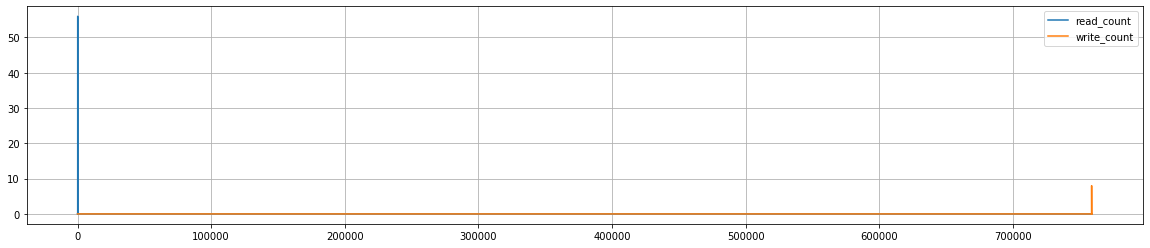

In [19]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot('time_step', 'read_count', data=tl);
plt.plot('time_step', 'write_count', data=tl);
plt.legend()

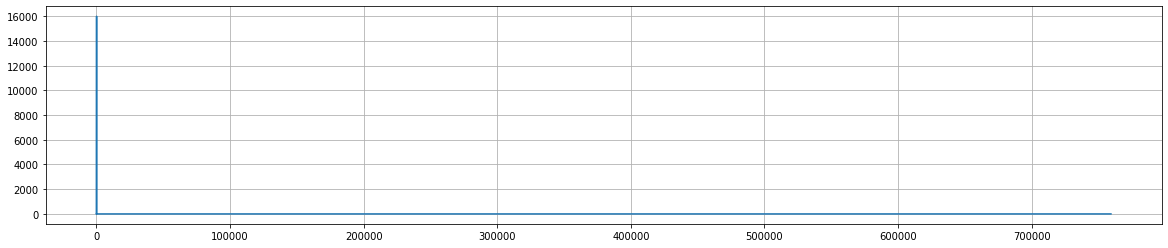

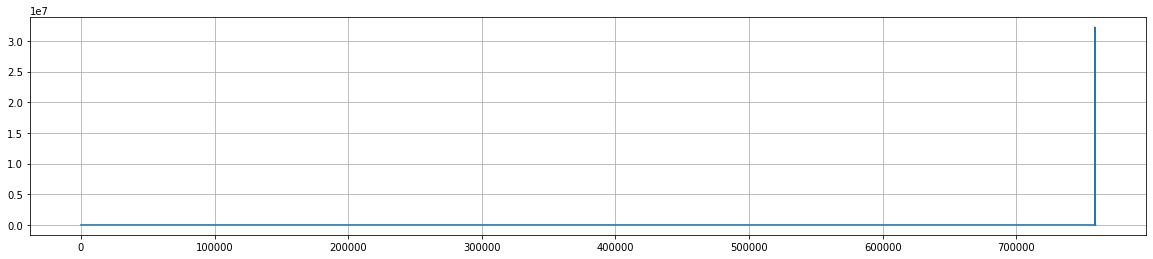

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot('time_step', 'read_bytes', data=tl);
plt.show();
plt.figure(figsize=(20,4))
plt.grid()
plt.plot('time_step', 'write_bytes', data=tl);
plt.show();



### How files are accessed over the duration of the Job.

[============================================================] 100.0% 112 of 112 Creating Timeline 


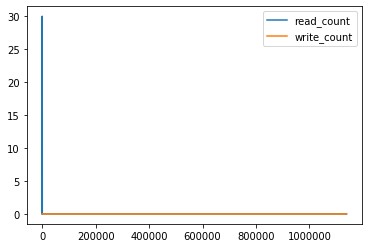

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/climate_run1_p8_tm_df_stats.csv


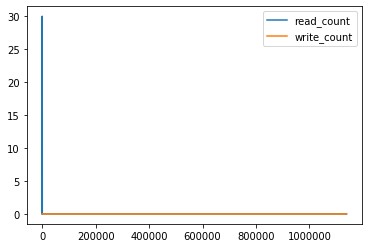


[============================================================] 100.0% 1 of 1 Creating Timeline 


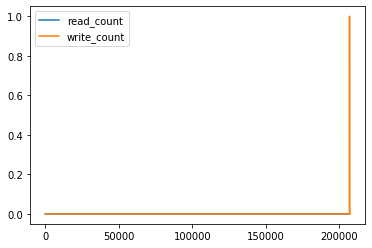


[============================================================] 100.0% 1 of 1 Creating Timeline 


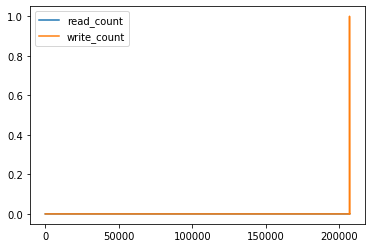


[============================================================] 100.0% 1 of 1 Creating Timeline 


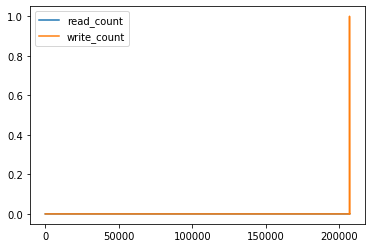


[============================================================] 100.0% 1 of 1 Creating Timeline 


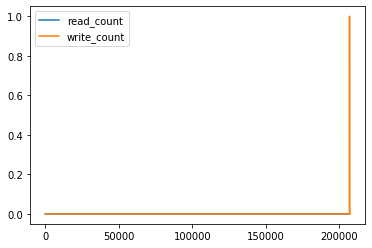


[============================================================] 100.0% 1 of 1 Creating Timeline 


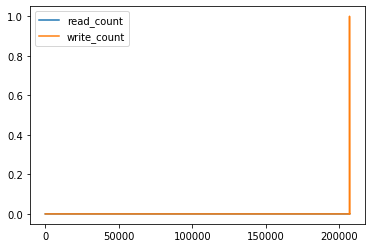


[============================================================] 100.0% 1 of 1 Creating Timeline 


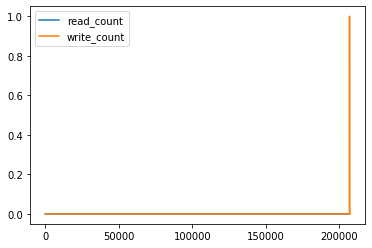


[============================================================] 100.0% 1 of 1 Creating Timeline 


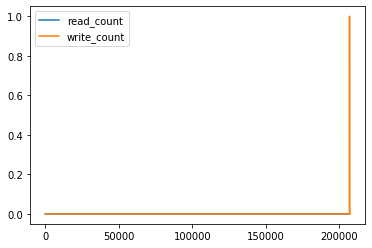


[============================================================] 100.0% 1 of 1 Creating Timeline 


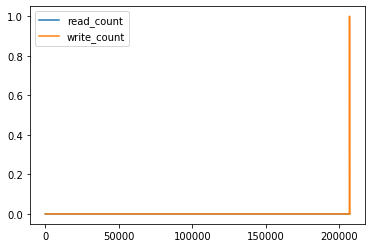


[============================================================] 100.0% 1 of 1 Creating Timeline 


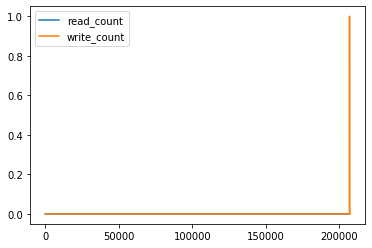


[============================================================] 100.0% 1 of 1 Creating Timeline 


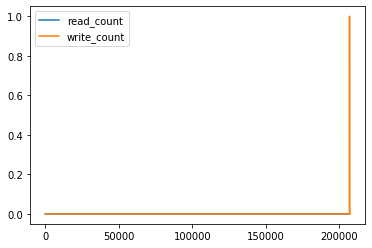


[============================================================] 100.0% 1 of 1 Creating Timeline 


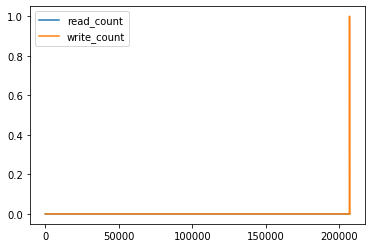


[============================================================] 100.0% 1 of 1 Creating Timeline 


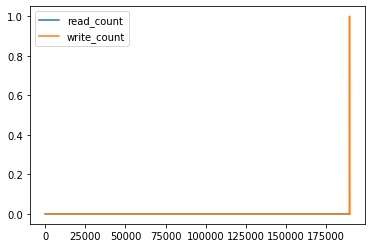


[============================================================] 100.0% 1 of 1 Creating Timeline 


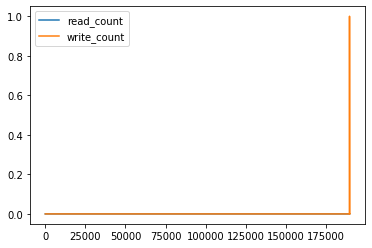


[============================================================] 100.0% 1 of 1 Creating Timeline 


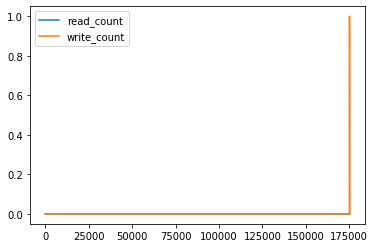

In [21]:
for file in df['Filename'].unique()[:16]:
    tl = profile.CreateIOTimeline(filepath=file)
    plt.plot('time_step', 'read_count', data=tl);
    plt.plot('time_step', 'write_count', data=tl);
    plt.legend()
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 30 of 30 Creating Timeline 


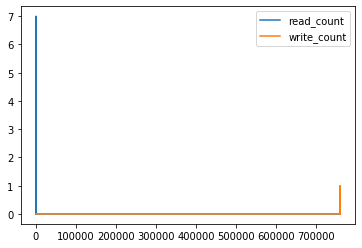

[============================================================] 100.0% 31 of 31 Creating Timeline 


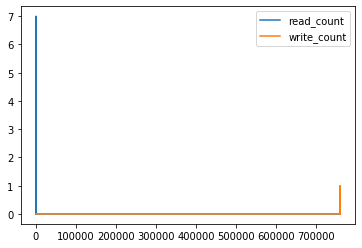

[============================================================] 100.0% 31 of 31 Creating Timeline 


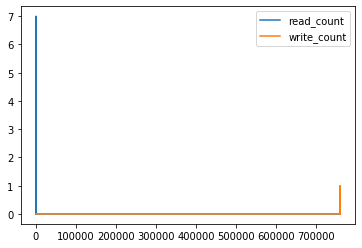

[============================================================] 100.0% 31 of 31 Creating Timeline 


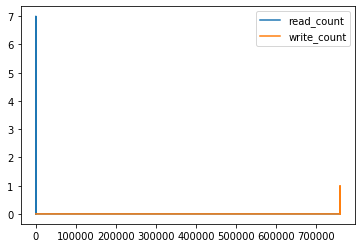

[============================================================] 100.0% 30 of 30 Creating Timeline 


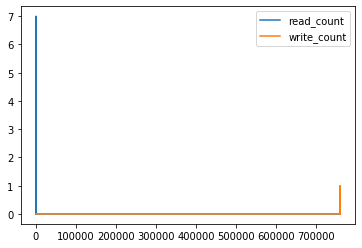

[============================================================] 100.0% 31 of 31 Creating Timeline 


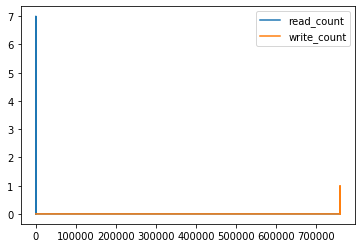

[============================================================] 100.0% 31 of 31 Creating Timeline 


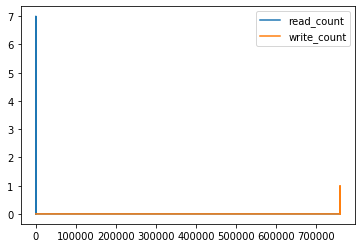

[============================================================] 100.0% 30 of 30 Creating Timeline 


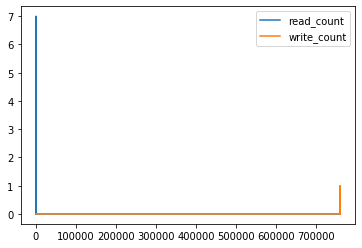

In [22]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.CreateIOTimeline(rank=rank)    
    plt.plot('time_step', 'read_count', data=tl);
    plt.plot('time_step', 'write_count', data=tl);
    plt.legend()
    plt.show()

### Data Transfer Size distribution within the application

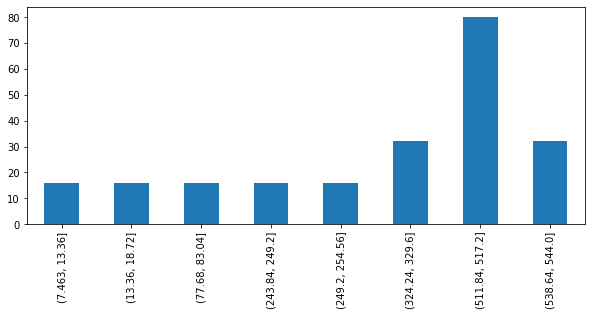

In [23]:
request_df_read = profile.GetIORequestDistribution(operation='read')
ax = request_df_read.plot(kind='bar', figsize=(10, 4));
plt.show()

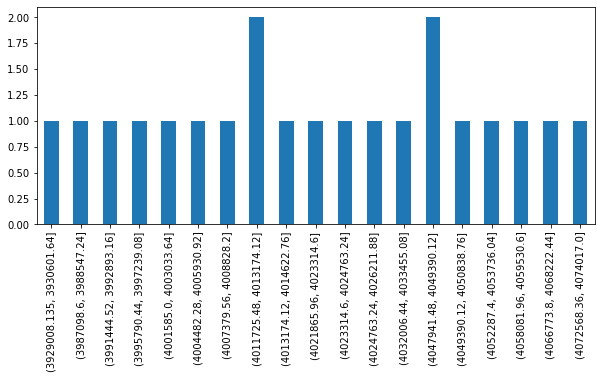

In [24]:
request_df_write = profile.GetIORequestDistribution(operation='write')
ax = request_df_write.plot(kind='bar', figsize=(10, 4));
plt.show()

### Data Transfer Size distribution for each file.

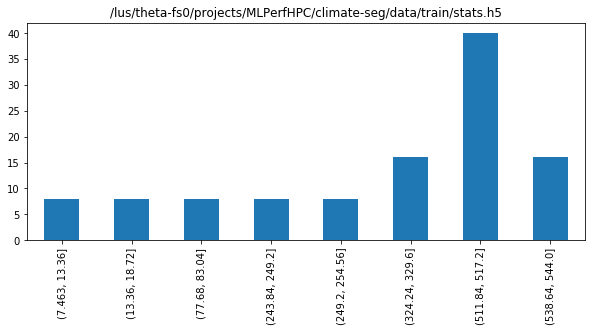

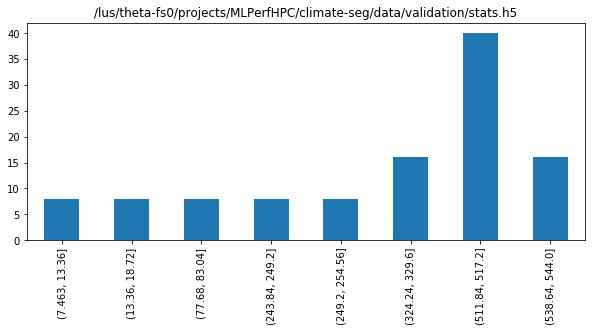

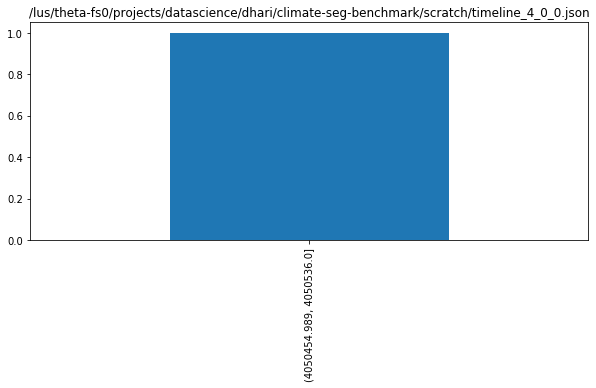

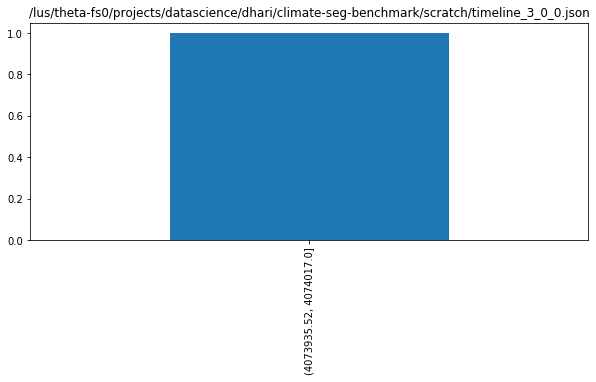

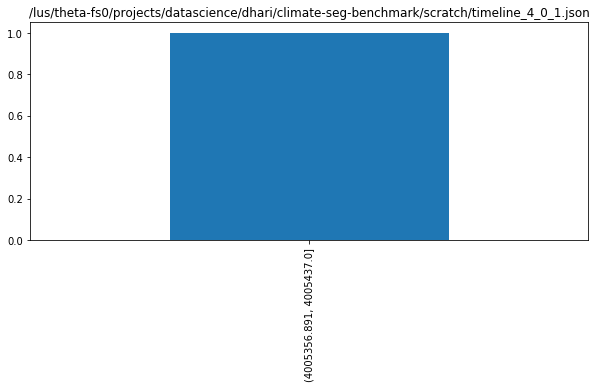

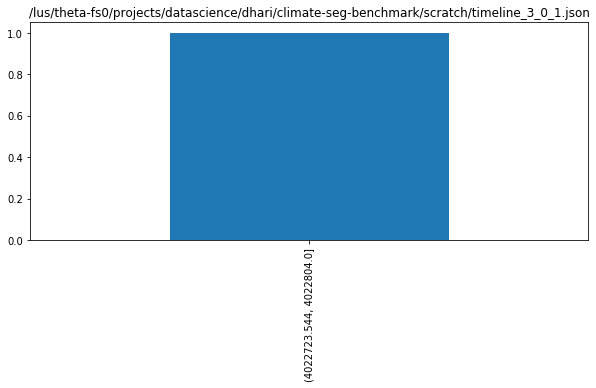

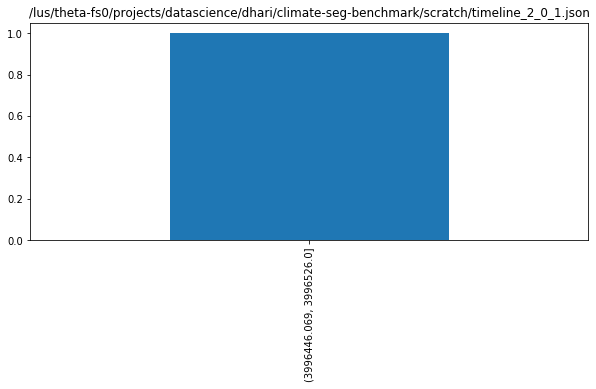

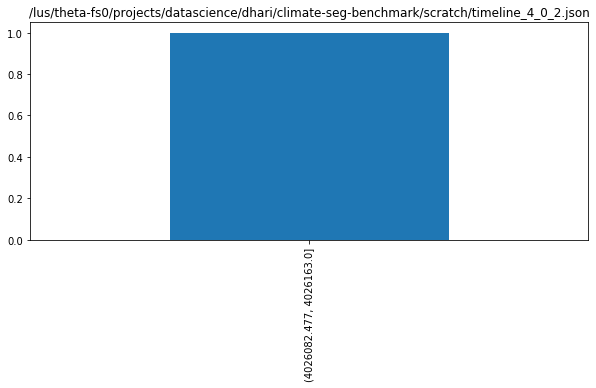

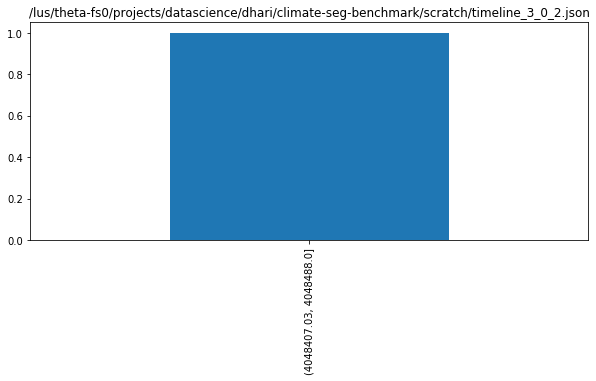

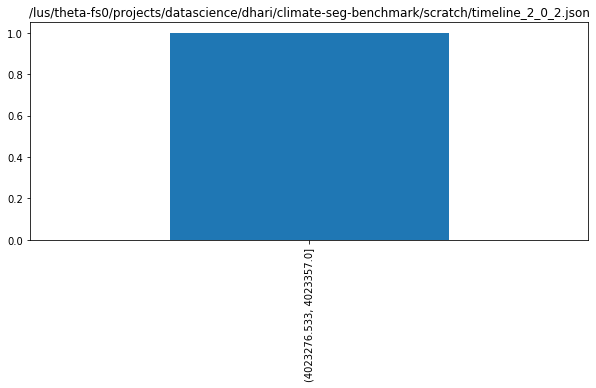

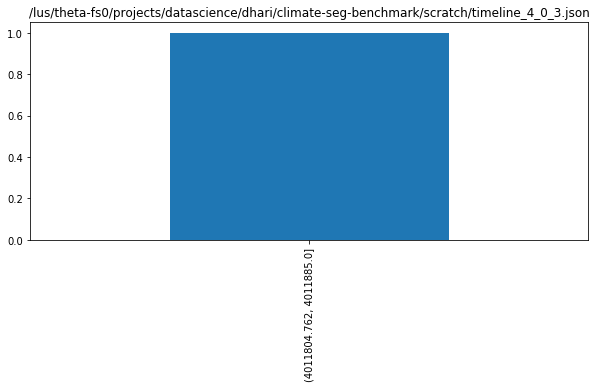

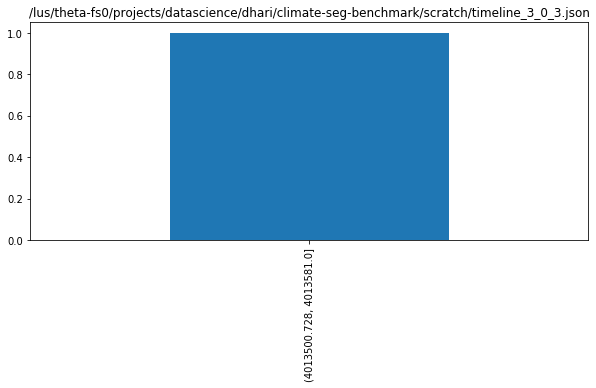

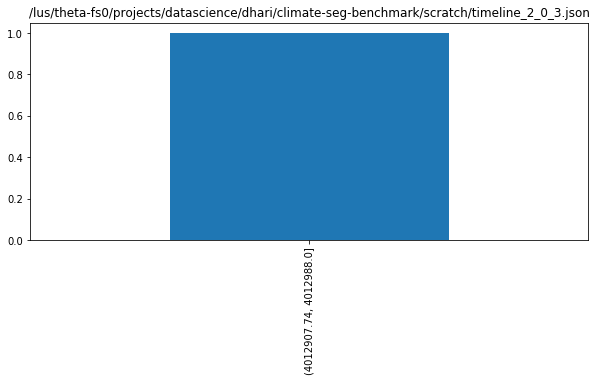

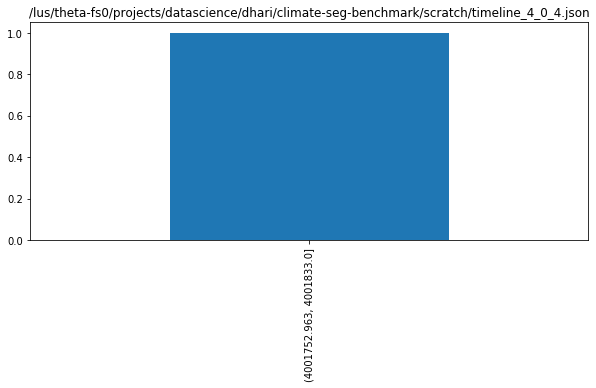

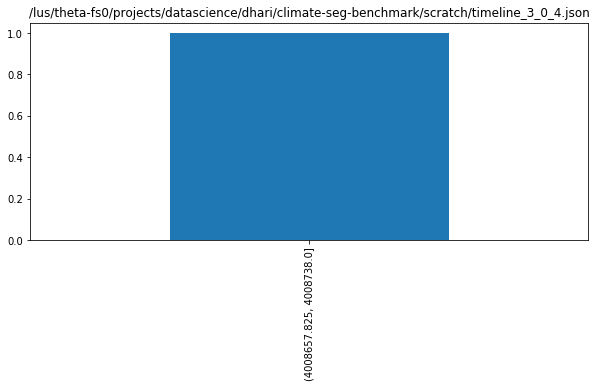

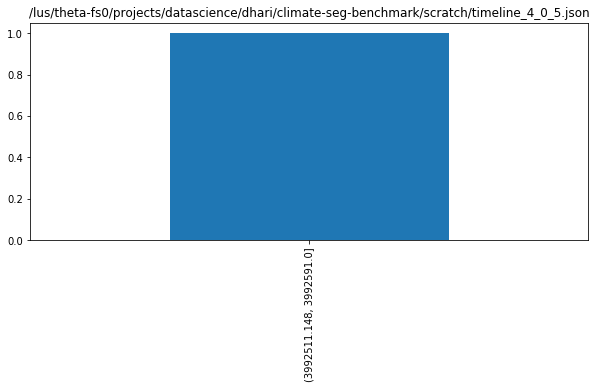

In [25]:
for file in df['Filename'].unique()[:16]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

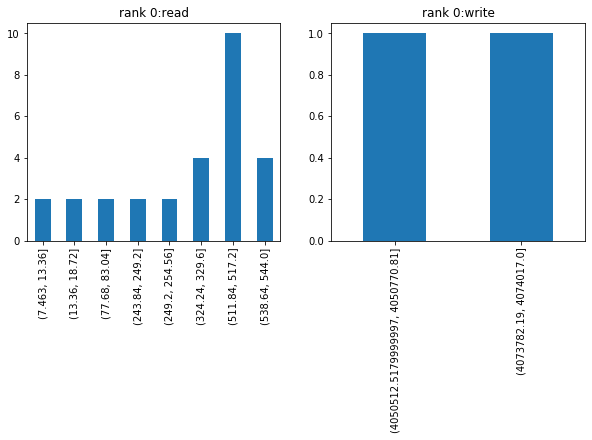

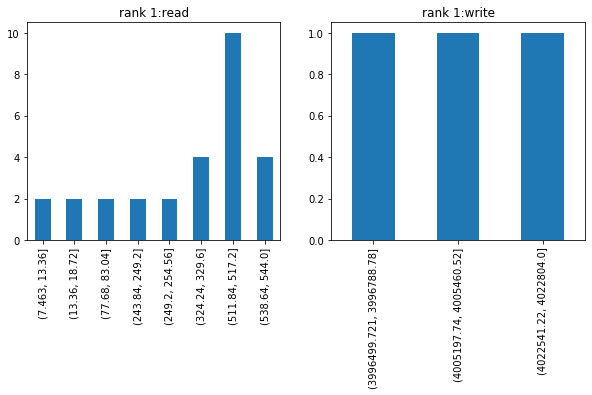

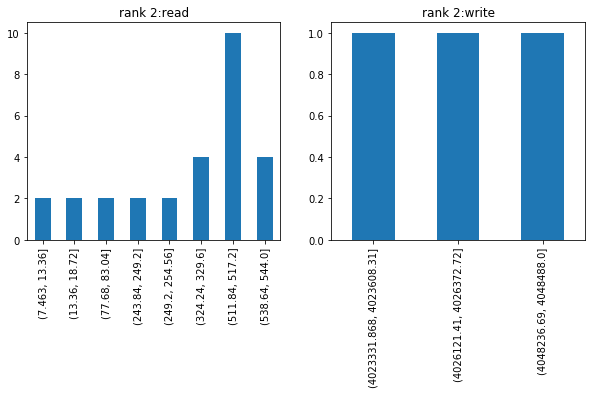

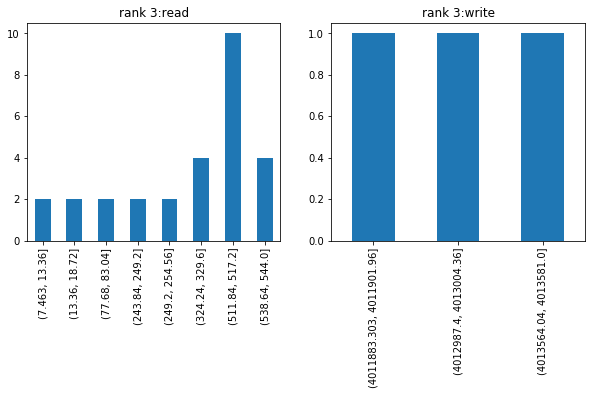

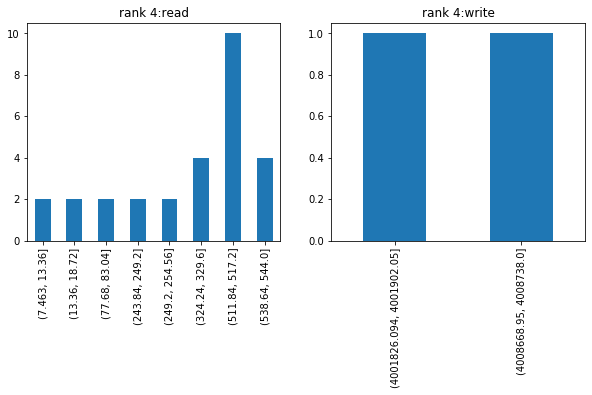

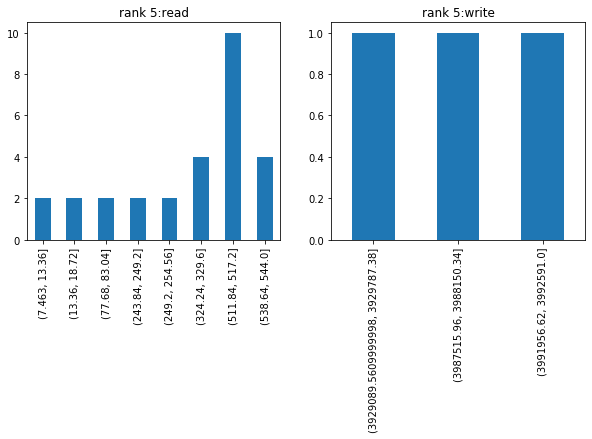

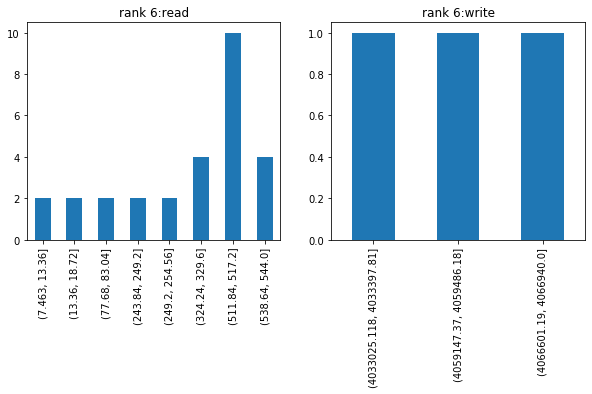

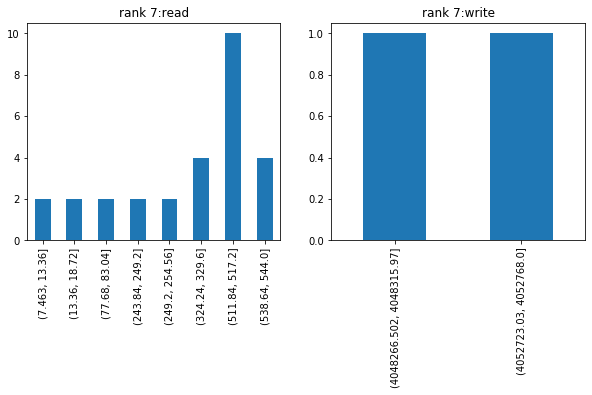

In [26]:
for rank in df['Rank'].unique()[:16]:
    fig, ax = plt.subplots(ncols=2,nrows=1)
    tl = profile.GetIORequestDistribution(rank=rank, operation='read')
    tl.plot(kind='bar', figsize=(10, 4), title=rank,ax=ax[0])
    ax[0].set_title("rank {}:read".format(rank))
    tl2 = profile.GetIORequestDistribution(rank=rank, operation='write')
    tl2.plot(kind='bar', figsize=(10, 4), title=rank,ax=ax[1])
    ax[1].set_title("rank {}:write".format(rank))
    plt.show()

### File summary of each file accessed by the Application

In [27]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if os.path.exists(file):
        print(file)
        pp.pprint(profile.GetFileSummary(file))

/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5
{'ext': 'h5',
 'filename': 'stats',
 'io_size': 39264,
 'io_time': 0.028850000000000008,
 'path': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
 'size': 4752,
 'special': {'keys': [{'keys': [{'name': 'labels_stats',
                                 'obj': <HDF5 dataset "labels_stats": shape (2, 3), type "<f4">,
                                 'shape': (2, 3),
                                 'size': 6,
                                 'type': 'dataset'},
                                {'name': 'stats',
                                 'obj': <HDF5 dataset "stats": shape (16, 4), type "<f4">,
                                 'shape': (16, 4),
                                 'size': 64,
                                 'type': 'dataset'}],
                       'name': 'climate',
                       'type': 'group'}],
             'name': 'stats',
             'type': 'group'}}
/lus/theta-fs0/

In [28]:
profile.CreateChromeTimeline(location="/home/dhari/timeline/apps/climate", filename="climate_run1_p8.json")

[============================================================] 100.0% 245 of 245 Creating DXT Timeline 
[============================================================] 100.0% 26 of 26 Creating DXT Timeline 


{'traceEvents': [{'name': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 271000,
   'pid': 2,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
    'Rank': 2,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 8,
    'Start': 0.271,
    'End': 0.2814}},
  {'name': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 271400,
   'pid': 7,
   'tid': 0,
   'args': {'Module': 'X_POSIX',
    'Filename': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
    'Rank': 7,
    'Operation': 'read',
    'Segment': 0,
    'Offset': 0,
    'Length': 8,
    'Start': 0.2714,
    'End': 0.2819}},
  {'name': '/lus/theta-fs0/projects/MLPerfHPC/climate-seg/data/train/stats.h5',
   'cat': 'X_POSIX',
   'ph': 'B',
   'ts': 272600,
   'pid': 1,
   'tid': 0,
   'args